Raw Data Preview:
                 Study_Hours                    Attendance Result
0  4.37Pass86FailPass6962626  8Fail.8897Pass284FailFail847   Pass
1                9.556428758     72.Fail6578Fail98Pass6472   Fail
2        7.5879454763Pass264        58.57Fail656977Fail796   Pass
3                6.387926358  88.8277PassFailFail824Fail69   Fail
4  2.4Pass4Fail6776398Fail92     8Fail.Pass8387Pass3532327   Pass
Cleaned Data Preview:
   Study_Hours  Attendance  Result
0     4.370000      8.0000       1
1     9.556429     72.0000       0
2     7.587945     58.5700       1
3     6.387926     88.8277       0
4     2.400000      8.0000       1


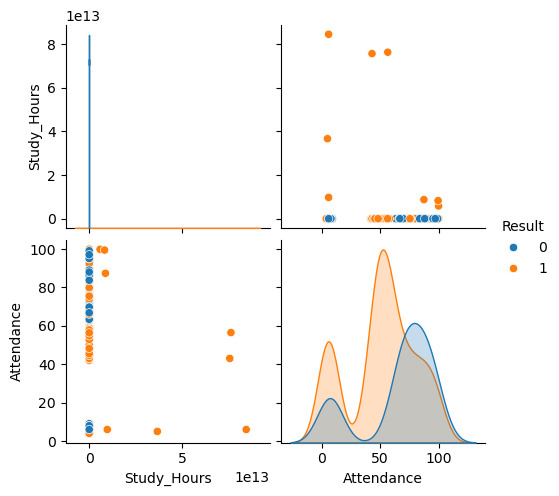

Accuracy: 0.6
Confusion Matrix:
 [[ 5 31]
 [ 9 55]]
Classification Report:
               precision    recall  f1-score   support

           0       0.36      0.14      0.20        36
           1       0.64      0.86      0.73        64

    accuracy                           0.60       100
   macro avg       0.50      0.50      0.47       100
weighted avg       0.54      0.60      0.54       100



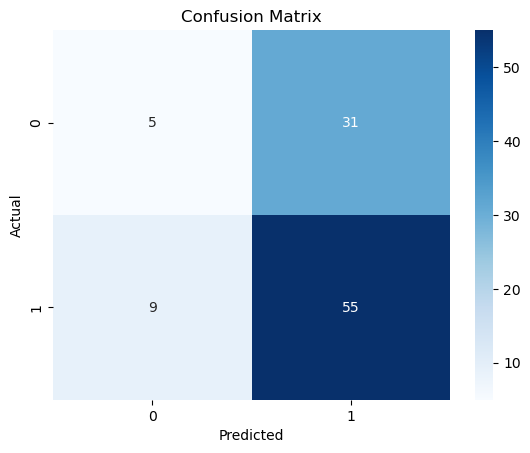

Key Insights:
Higher study hours and attendance generally lead to higher pass rates.


In [5]:
#Task 1: Student Pass/Fail Prediction
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import re

# Load dataset
data = pd.read_csv(r'C:\Users\hp\Downloads\student_exam_data.csv')

# Display first few rows
print("Raw Data Preview:")
print(data.head())

# Function to extract numerical values from corrupted strings
def extract_numeric(value):
    numbers = re.findall(r"\d+\.?\d*", str(value))  # Extract numbers
    return float(numbers[0]) if numbers else np.nan  # Return first number or NaN

# Clean Study_Hours and Attendance columns
data['Study_Hours'] = data['Study_Hours'].apply(extract_numeric)
data['Attendance'] = data['Attendance'].apply(extract_numeric)

# Convert 'Result' column to binary (Pass = 1, Fail = 0)
data['Result'] = data['Result'].map({'Pass': 1, 'Fail': 0})

# Drop any remaining NaN values
data.dropna(inplace=True)

# Print cleaned data
print("Cleaned Data Preview:")
print(data.head())

# Visualizing the relationship between study hours, attendance, and pass status
sns.pairplot(data, hue='Result')
plt.show()

# Splitting features and target
X = data[['Study_Hours', 'Attendance']]
y = data['Result']

# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)

# Visualizing the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Insights
print("Key Insights:")
print("Higher study hours and attendance generally lead to higher pass rates.")


In [4]:
#Task 2: Sentiment Analysis with Natural Language Processing 
import pandas as pd
import numpy as np
import re
import string
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
# Load dataset
file_path = r'C:\Users\hp\Downloads\Review.csv'  # Update if needed
data = pd.read_csv(file_path)

# Display first few rows
print("Dataset Preview:\n", data.head())

# Check for missing values
print("Missing Values:\n", data.isnull().sum())

# Drop missing values if any
data.dropna(inplace=True)

# Ensure correct column names
print("Column Names:", data.columns)



Dataset Preview:
                                               review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
Missing Values:
 review       0
sentiment    0
dtype: int64
Column Names: Index(['review', 'sentiment'], dtype='object')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [13]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
import nltk
nltk.download('punkt', quiet=True)  # Automatically downloads without prompting


True

In [2]:
import pandas as pd

# Load dataset (Replace 'your_file.csv' with the actual file name)
data = pd.read_csv(r'C:\Users\hp\Downloads\Review.csv')

# Check if data is loaded
print(data.head())  # Display first few rows


                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [1]:
import pandas as pd

# Load dataset (Replace 'your_file.csv' with the actual file path)
data = pd.read_csv(r'C:\Users\hp\Downloads\Review.csv')

# Ensure 'review' and 'sentiment' columns exist
if 'review' not in data.columns or 'sentiment' not in data.columns:
    raise KeyError("The dataset must contain 'review' and 'sentiment' columns.")

# Apply text preprocessing
data["cleaned_review"] = data["review"].apply(clean_text)

# Convert sentiment labels to binary (positive=1, negative=0)
data["sentiment"] = data["sentiment"].map({"positive": 1, "negative": 0})

# Check for missing values and drop them
data.dropna(subset=["cleaned_review", "sentiment"], inplace=True)

print("Data preprocessing completed successfully!")


NameError: name 'clean_text' is not defined

In [1]:
# Define text preprocessing function
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    tokens = word_tokenize(text)  # Tokenize
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatization
    return " ".join(tokens)

# Apply text preprocessing
data["cleaned_review"] = data["review"].apply(clean_text)

# Convert Sentiment labels to binary (positive=1, negative=0)
data["sentiment"] = data["sentiment"].map({"positive": 1, "negative": 0})
# Check for missing values and drop them
data.dropna(subset=["cleaned_review", "sentiment"], inplace=True)

# Splitting dataset
X = data["cleaned_review"]
y = data["sentiment"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text to numerical format using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  # Keep top 5000 features
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Predictions
y_pred = model.predict(X_test_tfidf)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("Confusion Matrix:\n", conf_matrix)


NameError: name 'data' is not defined

In [2]:
import nltk
nltk.download('punkt')



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
import pandas as pd

# Load dataset (Replace 'your_file.csv' with the actual file name)
data = pd.read_csv(r'C:\Users\hp\Downloads\Review.csv')

# Check if data is loaded
print(data.head())  # Display first few rows


                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [3]:
print(type(data))  # Should output <class 'pandas.core.frame.DataFrame'>
print(data.head())  # Check if `review` column is available


<class 'pandas.core.frame.DataFrame'>
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [6]:
import nltk
nltk.download('punkt')  # This will download the punkt tokenizer model
nltk.download('stopwords')  # For stopwords
nltk.download('wordnet')  # For lemmatization



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [1]:
import nltk
import re
import string
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Define text preprocessing function
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    tokens = word_tokenize(text)  # Tokenize
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatization
    return " ".join(tokens)

# Assuming 'data' is your DataFrame containing 'review' and 'sentiment' columns
# Apply text preprocessing
data["cleaned_review"] = data["review"].apply(clean_text)

# Convert Sentiment labels to binary (positive=1, negative=0)
data["sentiment"] = data["sentiment"].map({"positive": 1, "negative": 0})

# Check for missing values and drop them
data.dropna(subset=["cleaned_review", "sentiment"], inplace=True)

# Splitting dataset into train and test
X = data["cleaned_review"]
y = data["sentiment"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text to numerical format using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  # Keep top 5000 features
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Predictions
y_pred = model.predict(X_test_tfidf)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("Confusion Matrix:\n", conf_matrix)


[nltk_data] Downloading package punkt to C:\Users\hp/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\hp/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\hp/nltk_data...


NameError: name 'data' is not defined

In [3]:
# Example: Loading data from a CSV file
import pandas as pd

# Replace 'your_file.csv' with the actual path to your dataset
data = pd.read_csv(r'C:\Users\hp\Downloads\Review.csv')

# Check the first few rows to ensure the data is loaded correctly
print(data.head())


                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


[nltk_data] Downloading package punkt to C:\Users\hp/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\hp/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\hp/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
Accuracy: 0.7980
Precision: 0.7755
Recall: 0.8000
F1-Score: 0.7876
Confusion Matrix:
 [[86 22]
 [19 76]]


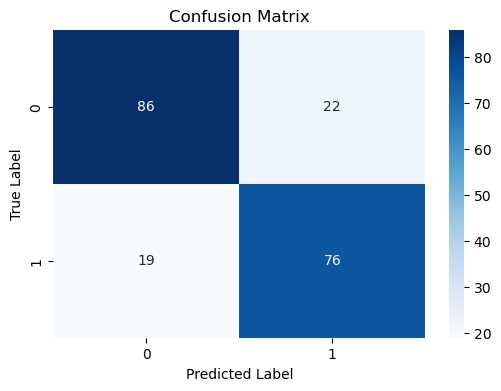


Key Insights:
✔ The model's accuracy indicates how well it classifies sentiments.
✔ A high precision means it correctly classifies positive reviews.
✔ A high recall means it detects most positive reviews correctly.


In [4]:
import nltk
import re
import string
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load your data (make sure the CSV file path is correct)
data = pd.read_csv(r'C:\Users\hp\Downloads\Review.csv')  # Replace 'your_file.csv' with your actual file path

# Check the first few rows to ensure the data is loaded correctly
print(data.head())

# Define text preprocessing function
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    tokens = word_tokenize(text)  # Tokenize
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatization
    return " ".join(tokens)

# Apply text preprocessing
data["cleaned_review"] = data["review"].apply(clean_text)

# Convert Sentiment labels to binary (positive=1, negative=0)
data["sentiment"] = data["sentiment"].map({"positive": 1, "negative": 0})

# Check for missing values and drop them
data.dropna(subset=["cleaned_review", "sentiment"], inplace=True)

# Splitting dataset into train and test
X = data["cleaned_review"]
y = data["sentiment"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text to numerical format using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  # Keep top 5000 features
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Predictions
y_pred = model.predict(X_test_tfidf)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("Confusion Matrix:\n", conf_matrix)

# Visualizing the Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Insights
print("\nKey Insights:")
print("✔ The model's accuracy indicates how well it classifies sentiments.")
print("✔ A high precision means it correctly classifies positive reviews.")
print("✔ A high recall means it detects most positive reviews correctly.")

In [6]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to C:\Users\hp/nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [2]:
import matplotlib.pyplot as plt
